#ARIMA Practical: Time Series Forecasting

🎯 Objective:

Model and forecast a synthetic time series using ARIMA (AutoRegressive Integrated Moving Average).



#✅ Step 1: Install and Import Required Libraries

In [1]:

# Install pmdarima for auto ARIMA (if not already installed)
!pip install --upgrade --force-reinstall numpy pandas statsmodels pmdarima --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
langchain-core 0.3.67 requires packaging<25,>=23.2, but you have packaging 25.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
plotnine 0.14.6 requires scipy<1.16.0,>=1.8.0, but you have scipy 1.16.0 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 whic

In [3]:
# -----------------------------------------------
# 📌 Step 2: Import Libraries
# -----------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [4]:
# -----------------------------------------------
# 📌 Step 3: Generate Synthetic Time Series Data
# -----------------------------------------------
# Let's simulate a time series with trend + seasonality + noise
np.random.seed(42)

# Create a daily date range
date_range = pd.date_range(start='2020-01-01', periods=200, freq='D')

# Simulate data: Trend + Seasonality + Noise
trend = np.linspace(10, 50, 200)
seasonality = 10 * np.sin(np.linspace(0, 20, 200))
noise = np.random.normal(loc=0, scale=2, size=200)

# Combine all components
data_series = trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': data_series})
df.set_index('Date', inplace=True)


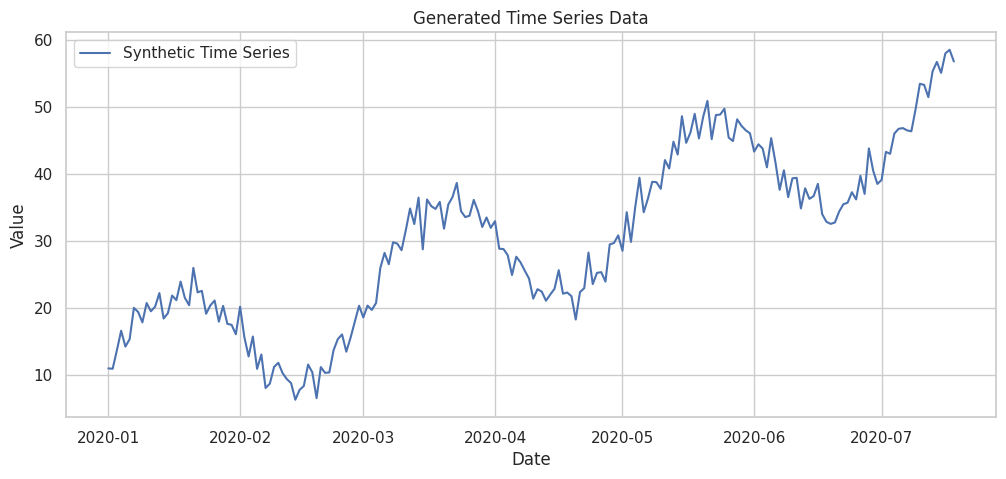

In [5]:
# -----------------------------------------------
# 📈 Step 4: Visualize the Time Series
# -----------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(df, label='Synthetic Time Series')
plt.title('Generated Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [6]:
# -----------------------------------------------
# 📌 Step 5: Split Data into Train and Test
# -----------------------------------------------
# Use 80% for training and 20% for testing
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [7]:
# -----------------------------------------------
# 🤖 Step 6: Fit ARIMA Model on Training Data
# -----------------------------------------------
# We manually select order=(p,d,q) as (2,1,2) for demo
# You can use auto_arima from pmdarima for automatic selection

model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

In [8]:
# -----------------------------------------------
# 🔮 Step 7: Forecast Future Values
# -----------------------------------------------
# Forecast for the length of test set
forecast = model_fit.forecast(steps=len(test))


In [9]:
# -----------------------------------------------
# 📊 Step 8: Evaluate Forecast Performance
# -----------------------------------------------
mse = mean_squared_error(test['Value'], forecast)
mae = mean_absolute_error(test['Value'], forecast)
rmse = np.sqrt(mse)

print("📌 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

📌 Evaluation Metrics:
Mean Absolute Error (MAE): 6.64
Mean Squared Error (MSE): 74.67
Root Mean Squared Error (RMSE): 8.64


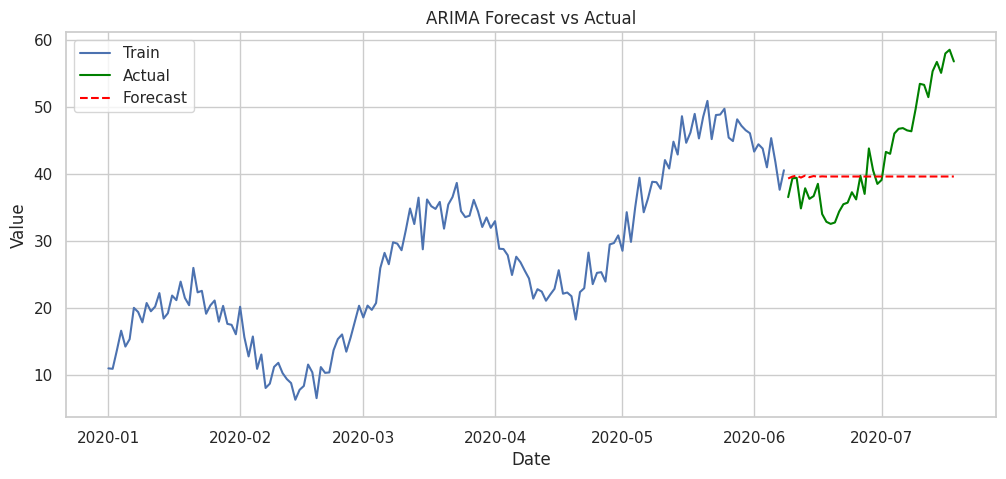

In [10]:
# -----------------------------------------------
# 📉 Step 9: Plot Actual vs Forecast
# -----------------------------------------------
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Value'], label='Train')
plt.plot(test.index, test['Value'], label='Actual', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

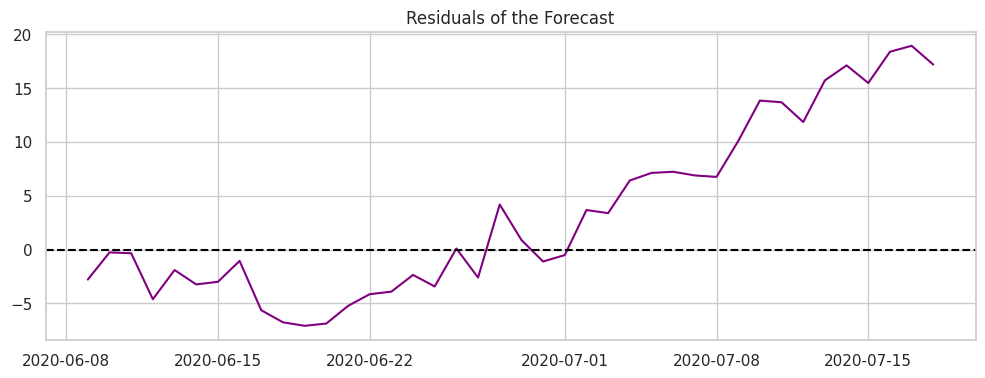

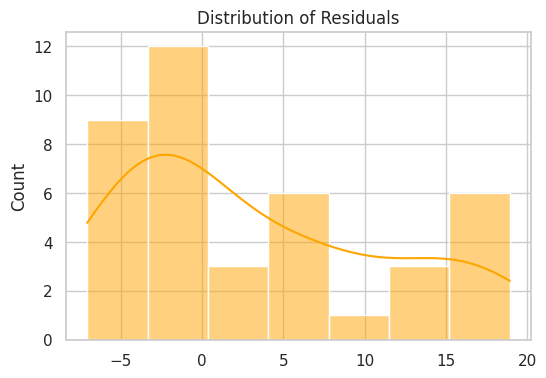

In [11]:
# -----------------------------------------------
# ✅ Optional: Plot Residuals
# -----------------------------------------------
residuals = test['Value'] - forecast

plt.figure(figsize=(12, 4))
plt.plot(residuals, color='purple')
plt.title('Residuals of the Forecast')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()



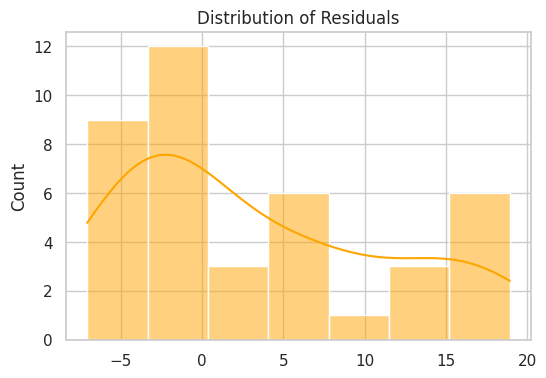

In [12]:
# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.show()

#🧠 Explanation Summary (for Students)

🎯 Goal:

To demonstrate ARIMA modeling on synthetic time series data, simulate real-world forecasting, and understand residual analysis and performance metrics.

#🔍 Key Concepts Covered:

Synthetic data generation (trend + seasonality + noise)

ARIMA modeling basics

Manual vs auto ARIMA model tuning

Forecasting and visualizing predictions

MAE, MSE, RMSE for evaluation

Residual analysis